# Great Learning Hackathon October 2023

## Shinkansen Travel Experience

We are trying to predict the overall experience of a traveller in the Shinkansen train. We have raw data containing information about the trip and the post survey 

In [1]:
# import libraries for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
travel_train = pd.read_csv('./data/Traveldata_train_.csv')
survey_train = pd.read_csv('./data/Surveydata_train_.csv')
travel_test = pd.read_csv('./data/Traveldata_test_.csv')
survey_test = pd.read_csv('./data/Surveydata_test_.csv')

In [3]:
# merge travel and survey on ID column
train = pd.merge(travel_train, survey_train, on='ID')
test = pd.merge(travel_test, survey_test, on='ID')

In [4]:
# create copies of train and test data
train_copy = train.copy()
test_copy = test.copy()

In [5]:
# get a feel for the data
train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [8]:
# check for missing values
train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [9]:
# create a list of columns that we want to create a new column for indicating it had a missing value
add_null_present_col = ['Customer_Type', 'Type_Travel', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Service']

In [10]:
# check for duplicates
print(train.duplicated().sum())
# also check if there are duplicate ids
print(train['ID'].duplicated().sum())

0
0


In [11]:
# show the value counts for each column
for col in train.columns:
    print("*"*20)
    print(train[col].value_counts())

********************
ID
98800001    1
98862916    1
98862925    1
98862924    1
98862923    1
           ..
98831459    1
98831458    1
98831457    1
98831456    1
98894379    1
Name: count, Length: 94379, dtype: int64
********************
Gender
Female    47815
Male      46487
Name: count, dtype: int64
********************
Customer_Type
Loyal Customer       69823
Disloyal Customer    15605
Name: count, dtype: int64
********************
Age
39.0    2688
25.0    2542
40.0    2333
44.0    2291
41.0    2248
        ... 
73.0      47
79.0      39
76.0      38
78.0      30
85.0      18
Name: count, Length: 75, dtype: int64
********************
Type_Travel
Business Travel    58617
Personal Travel    26536
Name: count, dtype: int64
********************
Travel_Class
Eco         49342
Business    45037
Name: count, dtype: int64
********************
Travel_Distance
1963    72
1789    68
1894    65
1639    65
1981    64
        ..
5028     1
4312     1
5267     1
4094     1
4156     1
Name: count

In [12]:
# set reference to target variable so we can hue the plots
target = "Overall_Experience"

y = train[target]

In [13]:
# get all of the continuous variables
cont_vars = train.select_dtypes(include=['int64', 'float64']).columns
# remove ID and Overall_Experience
cont_vars = cont_vars.drop(['ID', 'Overall_Experience'])
print(cont_vars)

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')


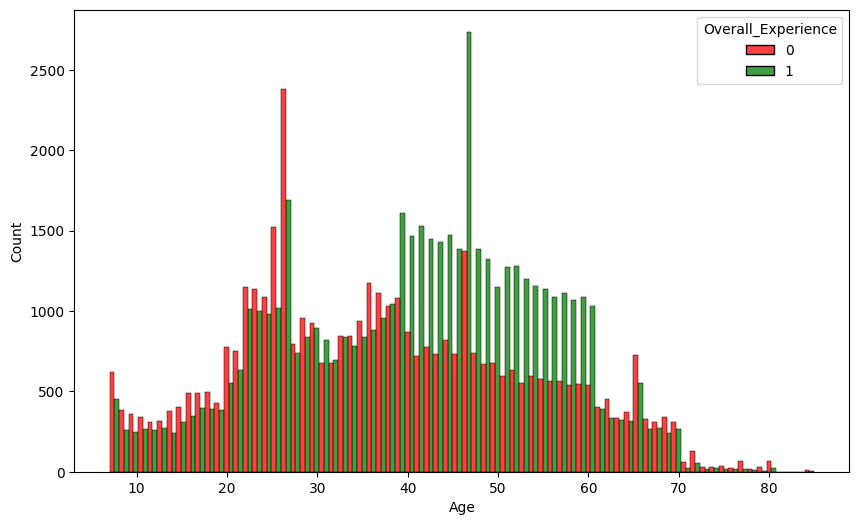

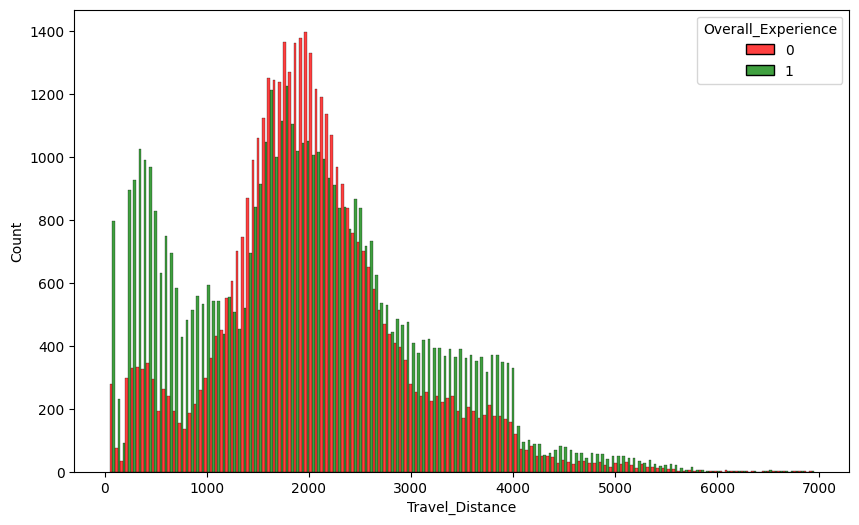

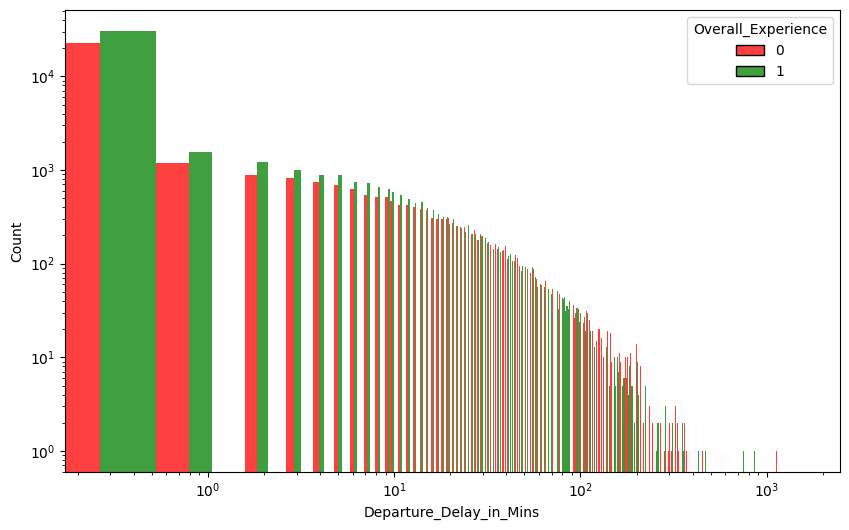

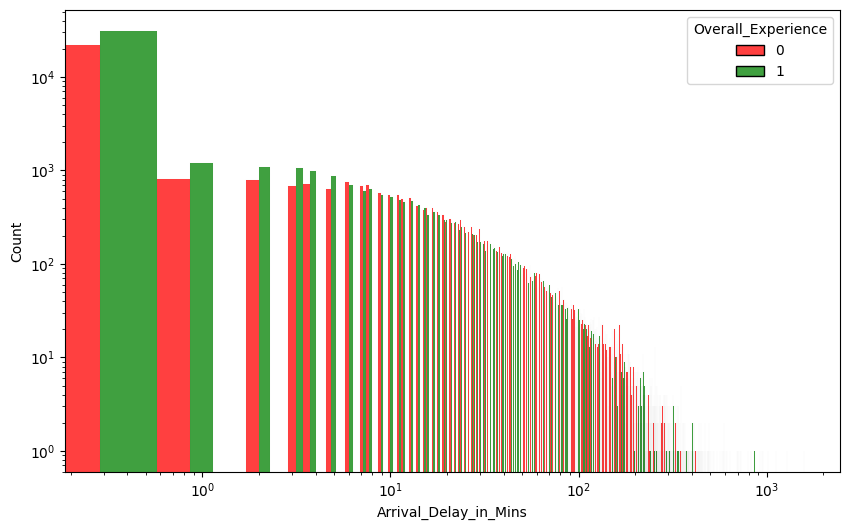

In [14]:
# for each continuous variable, plot a histogram hued by the target variable; color 0 red and 1 green
for col in cont_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x=col, hue=target, multiple='dodge', palette=['red', 'green'])
    # if the variable is one of the delay variables, set the y-axis to be a log scale
    if col in ['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']:
        plt.yscale('log')
        plt.xscale('log')
    plt.show()

In [15]:
# convert object columns to category
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

In [16]:
# for the columns indicated add a new column indicating if the row had a missing value for that column
for col in add_null_present_col:
    train[col + '_missing'] = train[col].isnull().astype(int)
    test[col + '_missing'] = test[col].isnull().astype(int)

In [17]:
# for all of the columns that we want to fill with the median, fill with the median
def fill_df(df):
    for col in df.isnull().sum()[df.isnull().sum() > 0].index:
        # fill with median if not categorical
        if df[col].dtype != 'category':
            df[col] = df[col].fillna(df[col].median())
        else:
            # fill with mode
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

train = fill_df(train)
test = fill_df(test)


In [18]:
# from inspection I want to create a new binary column indicating if the age was between 39 and 60
train['Age_39_to_60'] = (train['Age'] >= 39) & (train['Age'] <= 60)
# also new column if trip was less than 1250 km
train['Trip_Distance_Less_1250'] = train['Travel_Distance'] < 1250
# or greater than 3000 km
train['Trip_Distance_Greater_3000'] = train['Travel_Distance'] > 3000
# do the same for test
test['Age_39_to_60'] = (test['Age'] >= 39) & (test['Age'] <= 60)
test['Trip_Distance_Less_1250'] = test['Travel_Distance'] < 1250
test['Trip_Distance_Greater_3000'] = test['Travel_Distance'] > 3000

In [19]:
# we should now have no missing values
train.isnull().sum()

ID                                 0
Gender                             0
Customer_Type                      0
Age                                0
Type_Travel                        0
Travel_Class                       0
Travel_Distance                    0
Departure_Delay_in_Mins            0
Arrival_Delay_in_Mins              0
Overall_Experience                 0
Seat_Comfort                       0
Seat_Class                         0
Arrival_Time_Convenient            0
Catering                           0
Platform_Location                  0
Onboard_Wifi_Service               0
Onboard_Entertainment              0
Online_Support                     0
Ease_of_Online_Booking             0
Onboard_Service                    0
Legroom                            0
Baggage_Handling                   0
CheckIn_Service                    0
Cleanliness                        0
Online_Boarding                    0
Customer_Type_missing              0
Type_Travel_missing                0
A

In [20]:
test.isnull().sum()

ID                                 0
Gender                             0
Customer_Type                      0
Age                                0
Type_Travel                        0
Travel_Class                       0
Travel_Distance                    0
Departure_Delay_in_Mins            0
Arrival_Delay_in_Mins              0
Seat_Comfort                       0
Seat_Class                         0
Arrival_Time_Convenient            0
Catering                           0
Platform_Location                  0
Onboard_Wifi_Service               0
Onboard_Entertainment              0
Online_Support                     0
Ease_of_Online_Booking             0
Onboard_Service                    0
Legroom                            0
Baggage_Handling                   0
CheckIn_Service                    0
Cleanliness                        0
Online_Boarding                    0
Customer_Type_missing              0
Type_Travel_missing                0
Arrival_Time_Convenient_missing    0
C

In [22]:
# Import onehot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# drop the ID column and target variable
train_drop = train.drop(['ID', 'Overall_Experience'], axis=1)
test_drop = test.drop(['ID'], axis=1)

# list of all categorical columns
cat_cols = train_drop.select_dtypes(include='category').columns.tolist()

# Define the numerical columns
num_cols = train_drop.select_dtypes(include=['int64', 'float64']).columns.tolist()


# onehot encoder all categorical columns
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ])

# Fit the ColumnTransformer to the training data
train_ct = ct.fit_transform(train_drop)

# Transform the test data
test_ct = ct.transform(test_drop)

# Get the feature names from the OneHotEncoder and combine with numerical column names
new_cols = list(ct.named_transformers_['cat'].get_feature_names_out(input_features=cat_cols)) + num_cols

# Convert the transformed data back to a DataFrame
train_df = pd.DataFrame(train_ct, columns=new_cols)
test_df = pd.DataFrame(test_ct, columns=new_cols)


In [23]:
# get test, train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)
                                                    

In [24]:
# import random forest, xgboost, and ada boost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score
# import gridsearchcv and cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [32]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Satisfied', 'Satisfied'], yticklabels = ['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [26]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34381
           1       1.00      1.00      1.00     41122

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



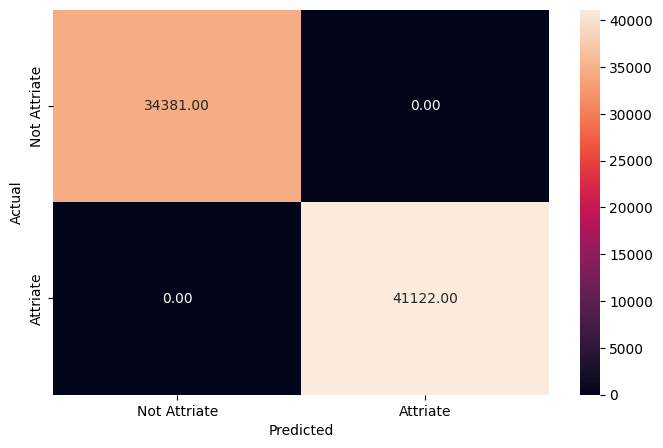

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8405
           1       0.96      0.95      0.96     10471

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



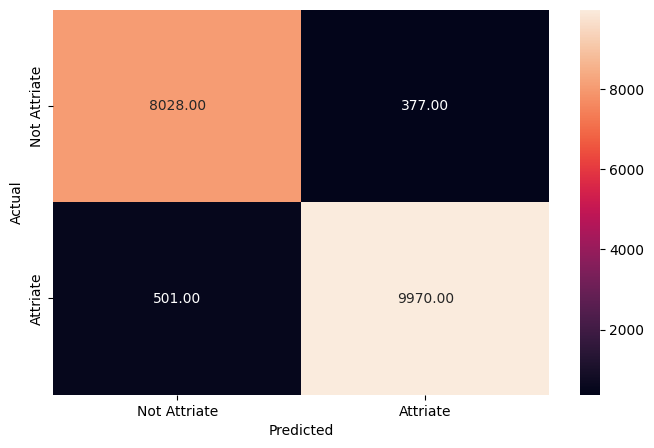

,Precision,Recall,Accuracy
0,0.952412,0.95365,0.953486


In [27]:
# test random forest
rf = RandomForestClassifier(n_estimators=250, random_state=42)
# fit the model
rf.fit(X_train, y_train)
# get train metrics
metrics_score(y_train, rf.predict(X_train))
# get predictions
rf_preds = rf.predict(X_test)
# get metrics
metrics_score(y_test, rf_preds)
# get model performance
model_performance_classification(rf, X_test, y_test)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     34381
           1       0.99      0.99      0.99     41122

    accuracy                           0.99     75503
   macro avg       0.99      0.99      0.99     75503
weighted avg       0.99      0.99      0.99     75503



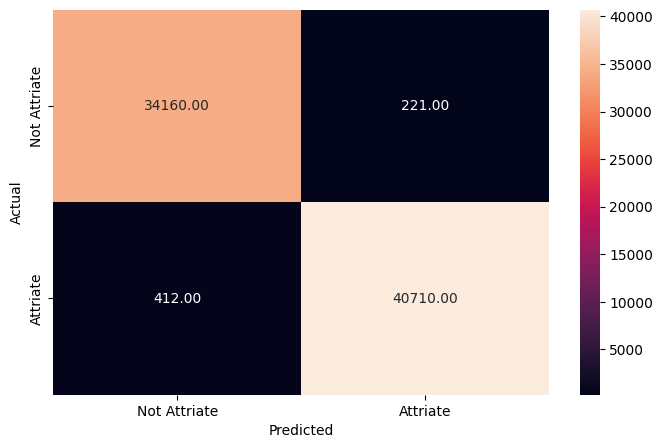

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8405
           1       0.96      0.96      0.96     10471

    accuracy                           0.96     18876
   macro avg       0.95      0.96      0.95     18876
weighted avg       0.96      0.96      0.96     18876



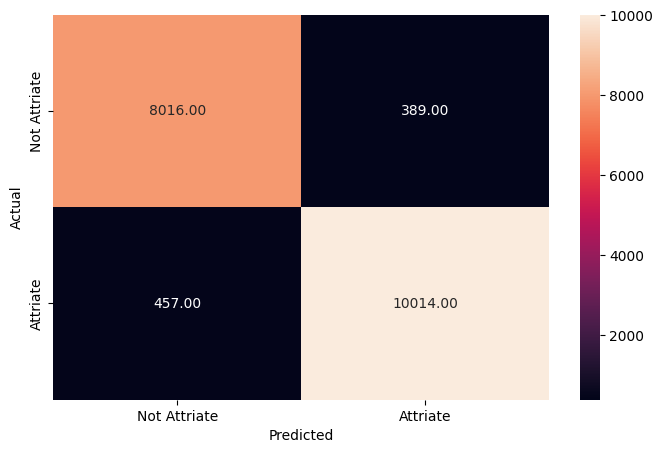

,Precision,Recall,Accuracy
0,0.954335,0.955037,0.955181


In [28]:
# test xgboost
xgb = XGBClassifier(n_estimators=250, random_state=42)
# fit the model
xgb.fit(X_train, y_train)
# get train metrics
metrics_score(y_train, xgb.predict(X_train))
# get predictions
xgb_preds = xgb.predict(X_test)
# get metrics
metrics_score(y_test, xgb_preds)
# get model performance
model_performance_classification(xgb, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     34381
           1       0.91      0.90      0.91     41122

    accuracy                           0.90     75503
   macro avg       0.90      0.90      0.90     75503
weighted avg       0.90      0.90      0.90     75503



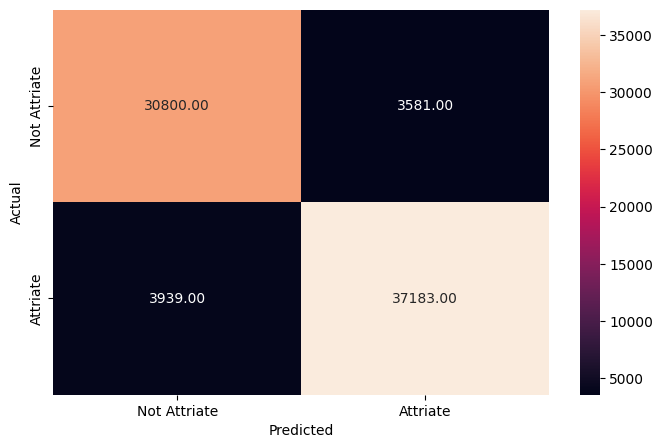

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      8405
           1       0.92      0.91      0.91     10471

    accuracy                           0.90     18876
   macro avg       0.90      0.90      0.90     18876
weighted avg       0.90      0.90      0.90     18876



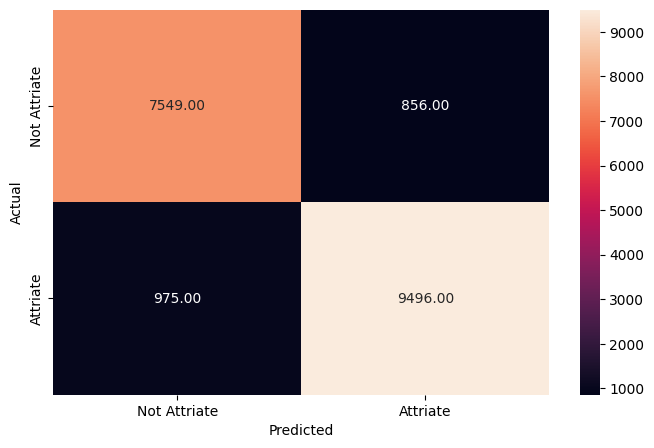

,Precision,Recall,Accuracy
0,0.901464,0.902521,0.902999


In [29]:
# test ada boost
ada = AdaBoostClassifier(n_estimators=250, random_state=42)
# fit the model
ada.fit(X_train, y_train)
# get train metrics
metrics_score(y_train, ada.predict(X_train))
# get predictions
ada_preds = ada.predict(X_test)
# get metrics
metrics_score(y_test, ada_preds)
# get model performance
model_performance_classification(ada, X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     34381
           1       0.95      0.94      0.94     41122

    accuracy                           0.94     75503
   macro avg       0.94      0.94      0.94     75503
weighted avg       0.94      0.94      0.94     75503



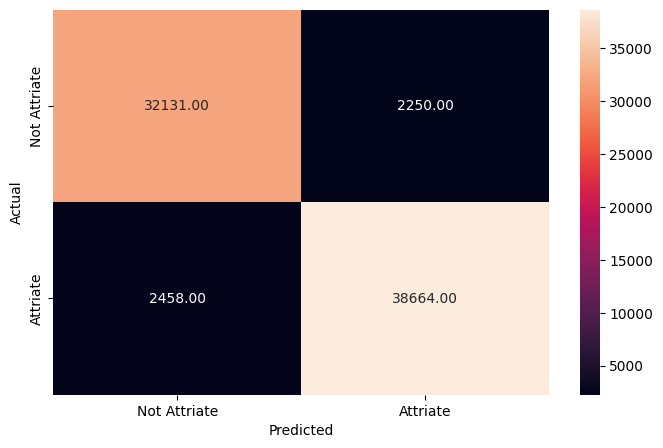

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      8405
           1       0.94      0.94      0.94     10471

    accuracy                           0.94     18876
   macro avg       0.93      0.94      0.93     18876
weighted avg       0.94      0.94      0.94     18876



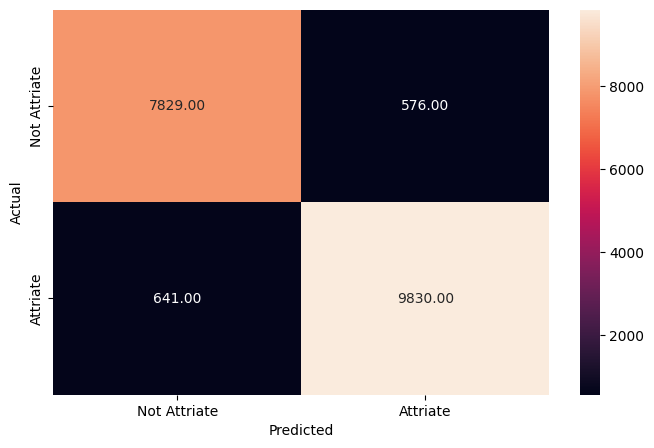

,Precision,Recall,Accuracy
0,0.934484,0.935126,0.935527


In [30]:
# test gradient boost
gb = GradientBoostingClassifier(n_estimators=250, random_state=42)
# fit the model
gb.fit(X_train, y_train)
# get train metrics
metrics_score(y_train, gb.predict(X_train))
# get predictions
gb_preds = gb.predict(X_test)
# get metrics
metrics_score(y_test, gb_preds)
# get model performance
model_performance_classification(gb, X_test, y_test)

## Final model creation and submission

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42786
           1       0.98      0.97      0.97     51593

    accuracy                           0.97     94379
   macro avg       0.97      0.97      0.97     94379
weighted avg       0.97      0.97      0.97     94379



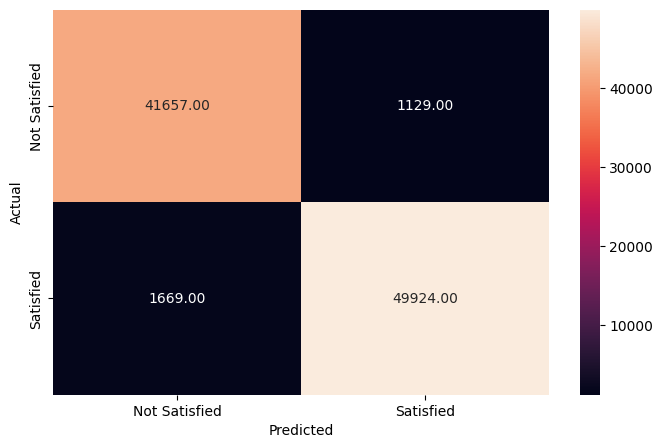

In [34]:
# use xgboost on full data
xgb = XGBClassifier(n_estimators=100, random_state=42)
# fit
xgb.fit(train_df, y)
# get train metrics
metrics_score(y, xgb.predict(train_df))



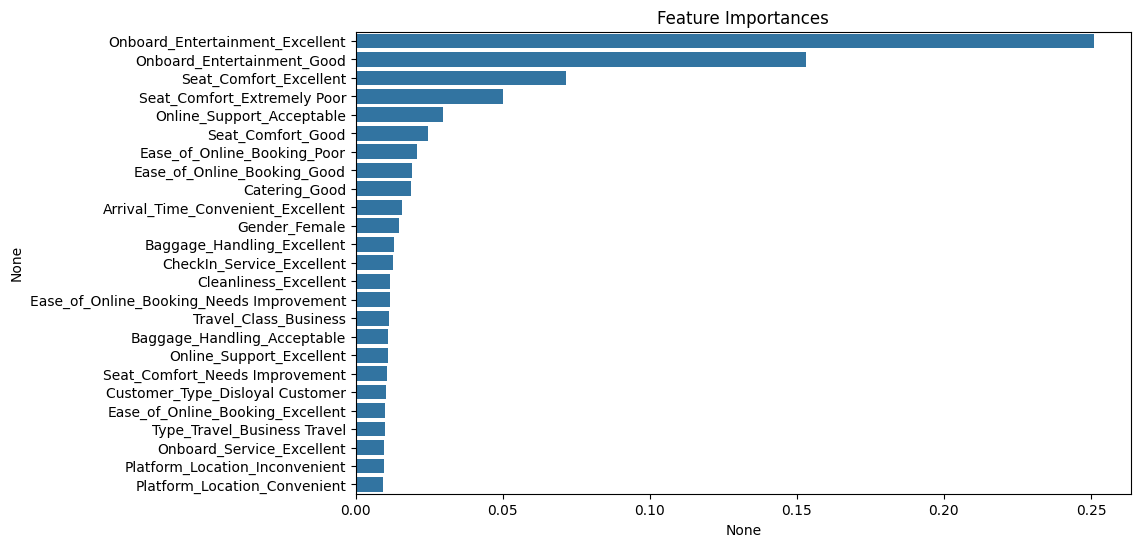

In [36]:
# plot the features by importance; plot 25 most important
importances = pd.Series(xgb.feature_importances_, index=train_df.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:25], y=importances[:25].index)
plt.title('Feature Importances')
plt.show()

In [38]:
# predict on test data
test_preds = xgb.predict(test_df)

# create submission dataframe
submission = pd.DataFrame({'ID': test['ID'], 'Overall_Experience': test_preds})
# save submission
submission.to_csv('submission.csv', index=False)